## Noise Correction.
by: JuanD Valenciano.

Reference:

Link: http://localhost:8888/notebooks/Hyper/GitHub/HyperspectralTools_Multi/Python/_sites_default_files_code_Python_remote-sensing_hyperspectral-data_Plot_Spectral_Signature_Tiles_py.ipynb

https://www.spectralpython.net/class_func_ref.html#spectrallibrary


Load Lib

In [1]:
import spectral.io.envi as envi
#import spectral
from spectral import *
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import wx
from wx import glcanvas
import numpy as np 
import warnings
import pandas as pd
#from IPython.html.widgets import *
from ipywidgets import *
#from IPython.html.widgets import interact # IPython < 4.x


Load Data .Hyspec

In [4]:
data_hdr     = '/home/juanval/Hyper/Experiment_2/Tommy/control_group/sample_1/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr.hdr'
data_hyspex  = '/home/juanval/Hyper/Experiment_2/Tommy/control_group/sample_1/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr.hyspex'
DataHyspec = envi.open(data_hdr,data_hyspex)
print('RowData: ')
print(DataHyspec)
#img.info()
#view = imshow(img)
#view_nd(img)
#save_rgb('rgb.jpg', img, [29, 19, 9])
data_hdrRadiance     = '/home/juanval/Hyper/CalibrateData/Tommy/control_group/sample_1/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad_f32.hdr'
data_hyspexRadiance  = '/home/juanval/Hyper/CalibrateData/Tommy/control_group/sample_1/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad_f32.img'
DataHyspecRadiance = envi.open(data_hdrRadiance, data_hyspexRadiance)
print('CalibrationData: ')
print(DataHyspecRadiance)

data_hdrRadiancex6     = '/home/juanval/Hyper/CalibrateData/Tommy/control_group/sample_1/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad.hdr'
data_hyspexRadiancex6  = '/home/juanval/Hyper/CalibrateData/Tommy/control_group/sample_1/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad.img'
DataHyspecRadiancex6 = envi.open(data_hdrRadiancex6, data_hyspexRadiancex6)
print('CalibrationData: ')
print(DataHyspecRadiancex6)

data_hdrRadianceSample     = '/home/juanval/Hyper/Experiment_2/Test/test_d2/test2_16000_us_2x_2019-11-25T124320_corr.hdr'
data_hyspexRadianceSample  = '/home/juanval/Hyper/Experiment_2/Test/test_d2/test2_16000_us_2x_2019-11-25T124320_corr.hyspex'
DataHyspecRadianceSample = envi.open(data_hdrRadianceSample, data_hyspexRadianceSample)
print('CalibrationDataSample: ')
print(DataHyspecRadianceSample)



RowData: 
	Data Source:   '/home/juanval/Hyper/Experiment_2/Tommy/control_group/sample_1/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr.hyspex'
	# Rows:           3800
	# Samples:        1600
	# Bands:           160
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16
CalibrationData: 
	Data Source:   '/home/juanval/Hyper/CalibrateData/Tommy/control_group/sample_1/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad_f32.img'
	# Rows:           1610
	# Samples:        1600
	# Bands:           160
	Interleave:        BIL
	Quantization:  32 bits
	Data format:   float32
CalibrationData: 
	Data Source:   '/home/juanval/Hyper/CalibrateData/Tommy/control_group/sample_1/tom_cgs_01_16000_us_2x_2019-11-24T121227_corr_rad.img'
	# Rows:           1610
	# Samples:        1600
	# Bands:           160
	Interleave:        BIL
	Quantization:  16 bits
	Data format:    uint16
CalibrationDataSample: 
	Data Source:   '/home/juanval/Hyper/Experiment_2/Test/test_d2/test2_16000_us_2x_2019-11-25

ImageView object:
  Display bands       :  [55, 41, 12]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.0, 33950.0]
    G: [0.0, 27610.0]
    B: [0.0, 6812.0]

ImageView object:
  Display bands       :  [55, 41, 12]
  Interpolation       :  <default>
  RGB data limits     :
    R: [0.00017116215894930065, 0.24212314188480377]
    G: [0.000290399300865829, 0.17059415578842163]
    B: [0.0, 0.06563727557659149]



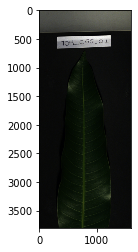

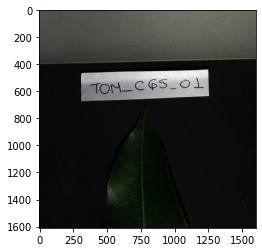

In [11]:
Display_V1 = imshow(DataHyspec)
Display_V2 = imshow(DataHyspecRadiance)
#save_rgb('Display_V1.jpg', DataHyspec)
print(Display_V1)
print(Display_V2)
#print(DataHyspec['Bands'])

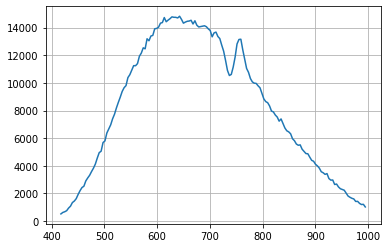

In [12]:
#print(DataHyspec.nbands)
#view_cube(DataHyspec, bands=[29, 19, 9])
#print(DataHyspec.read_pixel(0,1000))
fig, ax = plt.subplots()
ax.plot(DataHyspec.bands.centers, DataHyspec.read_pixel(0,1000))
ax.grid()
##fig.savefig("test.png")
plt.show()
##reflectance = DataHyspec[pixel_y,pixel_x,:]
##reflectance[nan_ind]=np.nan

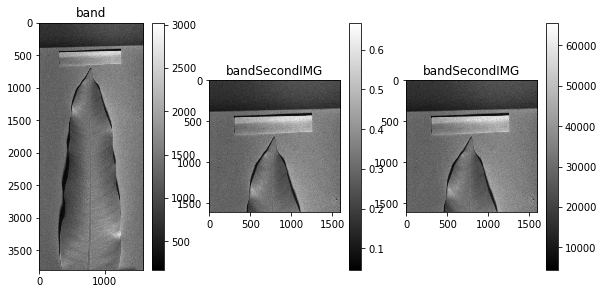

In [13]:
plt.figure(figsize=(10,10))        
#plt.imshow(HUV, cmap=plt.cm.gray), plt.title('band')
# Start 0 to (bands-1)
plt.subplot(231), plt.imshow(DataHyspec.read_band(159), cmap=plt.cm.gray), plt.title('band')
plt.colorbar();
plt.subplot(232), plt.imshow(DataHyspecRadiance.read_band(159), cmap=plt.cm.gray), plt.title('bandSecondIMG')
plt.colorbar();
plt.subplot(233), plt.imshow(DataHyspecRadiancex6.read_band(159), cmap=plt.cm.gray), plt.title('bandSecondIMG')
plt.colorbar();
plt.show()


In [109]:
#print(DataHyspec.read_band(5))
print(DataHyspec.bands.centers)
#print(read_band(10,DataHyspec)


[417.563436, 421.192819, 424.822201, 428.451583, 432.080965, 435.710347, 439.33973, 442.969112, 446.598494, 450.227876, 453.857258, 457.48664, 461.116023, 464.745405, 468.374787, 472.004169, 475.633551, 479.262934, 482.892316, 486.521698, 490.15108, 493.780462, 497.409844, 501.039227, 504.668609, 508.297991, 511.927373, 515.556755, 519.186138, 522.81552, 526.444902, 530.074284, 533.703666, 537.333048, 540.962431, 544.591813, 548.221195, 551.850577, 555.479959, 559.109341, 562.738724, 566.368106, 569.997488, 573.62687, 577.256252, 580.885635, 584.515017, 588.144399, 591.773781, 595.403163, 599.032545, 602.661928, 606.29131, 609.920692, 613.550074, 617.179456, 620.808839, 624.438221, 628.067603, 631.696985, 635.326367, 638.955749, 642.585132, 646.214514, 649.843896, 653.473278, 657.10266, 660.732043, 664.361425, 667.990807, 671.620189, 675.249571, 678.878953, 682.508336, 686.137718, 689.7671, 693.396482, 697.025864, 700.655247, 704.284629, 707.914011, 711.543393, 715.172775, 718.802157, 

In [115]:
np.min(metadata['wavelength'])
#print(DataHyspec.get_spectrum(5))
#view_cube(DataHyspec)

/home/juand/anaconda3/envs/R_Studio_Python/lib/python3.7/site-packages/spectral/graphics/graphics.py:800: UserWarning: 
There is no current wx.App object - creating one now.
  UserWarning)


wxAssertionError: C++ assertion "xid" failed at /tmp/build/80754af9/wxpython_1547931003892/work/ext/wxWidgets/src/unix/glx11.cpp(194) in SetCurrent(): window must be shown


Mouse Functions:
----------------
left-click & drag        ->   Rotate cube
CTRL+left-click & drag   ->   Zoom in/out
SHIFT+left-click & drag  ->  Pan

Keybinds:
---------
l       -> toggle light
t/g     -> stretch/compress z-dimension
h       -> print help message
q       -> close window



In [7]:
def spectraPlot(pixel_x,pixel_y):

    reflectance = refl[pixel_y,pixel_x]
    #reflectance[nan_ind]=np.nan
    #print(reflectance)
    pixel_df = pd.DataFrame()
    pixel_df['reflectance'] = reflectance
    pixel_df['wavelengths'] = w
        
    fig = plt.figure(figsize=(8,5))
    ax1 = fig.add_subplot(1,2,1)
        
    # fig, axes = plt.subplots(nrows=1, ncols=2)
    
    pixel_df.plot(ax=ax1,x='wavelengths',y='reflectance',kind='scatter',edgecolor='none');
    pixel_df.plot(ax=ax1,x='wavelengths',y='reflectance',kind='scatter',edgecolor='none');
    ax1.set_title('Spectra of Pixel (' + str(pixel_x) + ',' + str(pixel_y) + ')')
    ax1.set_xlim([np.min(pixel_df['wavelengths']),np.max(pixel_df['wavelengths'])]); 
    ax1.set_ylim([np.min(pixel_df['reflectance']),np.max(pixel_df['reflectance']*1.1)])
    ax1.set_xlabel("wavelengths, nm"); ax1.set_ylabel("Reflectance")
    ax1.grid('on')
    
    ax2 = fig.add_subplot(1,2,2)
    #plot = plt.imshow(refl_band,extent=metadata['spatial extent'],clim=(0,0.1)); 
    plot = plt.imshow(DataHyspecRadianceSample.read_band(159), cmap=plt.cm.gray)
    plt.title('Pixel Location'); 
    cbar = plt.colorbar(plot,aspect=20); plt.set_cmap('gist_earth'); 
    cbar.set_label('Reflectance?',rotation=90,labelpad=20); 
    ax2.ticklabel_format(useOffset=False, style='plain') #do not use scientific notation 
    rotatexlabels = plt.setp(ax2.get_xticklabels(),rotation=90) #rotate x tick labels 90 degrees
    
    ax2.plot(pixel_x,pixel_y,'s',markersize=5,color='red')
    #ax2.set_xlim(metadata['spatial extent'][0],metadata['spatial extent'][1])
    #ax2.set_ylim(metadata['spatial extent'][2],metadata['spatial extent'][3])
refl = DataHyspec
w = DataHyspec.bands.centers
interact(spectraPlot, pixel_x = (0,refl.shape[1]-1,1),pixel_y=(0,refl.shape[0]-1,1))    

interactive(children=(IntSlider(value=799, description='pixel_x', max=1599), IntSlider(value=1899, description…

<function __main__.spectraPlot(pixel_x, pixel_y)>

In [123]:
refl[500,500,:]

array([[[  888,  1084,  1382,  1614,  1826,  2156,  2541,  2917,  3319,
          3735,  4254,  4712,  5017,  5400,  5818,  6206,  6779,  7311,
          7495,  8021,  8725,  9163,  9876, 10292, 11209, 11713, 12330,
         13018, 13535, 14053, 14739, 15254, 15676, 16511, 16921, 17538,
         17663, 18432, 18727, 19321, 19567, 20049, 20560, 20854, 21191,
         21864, 22026, 22274, 22790, 22434, 23404, 23715, 24032, 23730,
         24304, 24812, 25044, 24978, 25276, 25495, 25611, 25470, 25673,
         25976, 25611, 25412, 25790, 25361, 25086, 25107, 24761, 24985,
         24712, 24789, 24332, 24816, 24753, 24550, 24247, 24378, 24140,
         23657, 23662, 23486, 22890, 22062, 20892, 19458, 18676, 18773,
         19901, 21449, 22675, 23237, 23236, 22235, 20963, 19988, 19264,
         18789, 18286, 17478, 17493, 17276, 17000, 16438, 15809, 15846,
         15310, 15076, 14790, 14528, 13979, 13779, 13298, 13323, 12669,
         12486, 11993, 11274, 10980, 11019, 10564, 10358, 10089,

In [6]:
refl = DataHyspecRadianceSample
w = DataHyspecRadianceSample.bands.centers
interact(spectraPlot, pixel_x = (0,refl.shape[1]-1,1),pixel_y=(0,refl.shape[0]-1,1))    

interactive(children=(IntSlider(value=799, description='pixel_x', max=1599), IntSlider(value=399, description=…

<function __main__.spectraPlot(pixel_x, pixel_y)>